# fundamentals of lattice-based cryptography

## what is a lattice?

An $n$-dimensional *lattice* $L$ is a discrete addictive subgroup of $\mathbb{R}^n$

- **discrete**: This means that every point $x \in L$ has some "neighborhood" in which $x$ is the only lattice point. That is, for every point $x$ there is "good" space around it

Below, we will see what a lattice is and what is not.

In [123]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from numpy import typing

def points_generator(basis_1: NDArray, basis_2: NDArray):
    # Generate lattice points
    x = np.arange(-5, 5)
    y = np.arange(-5, 5)
    lattice_points = np.array([i * basis_1 + j * basis_2 for i in x for j in y])
    return lattice_points

def plotter_2d(points: NDArray):    
    # Plot
    plt.figure(figsize=(10, 10))
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Lattice Points')
    # plt.quiver(0, 0, basis_1[0], basis_1[1], angles='xy', scale_units='xy', scale=1, color='red', label='basis 1')
    # plt.quiver(0, 0, basis_2[0], basis_2[1], angles='xy', scale_units='xy', scale=1, color='green', label='basis 2')
    
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.title('2D Lattice')
    plt.show()

- The singleton set $\{0\} \in \mathbb{R}^n$ is a lattice(for any positive integer $n$). That is, the zero set in any dimension is a lattice.

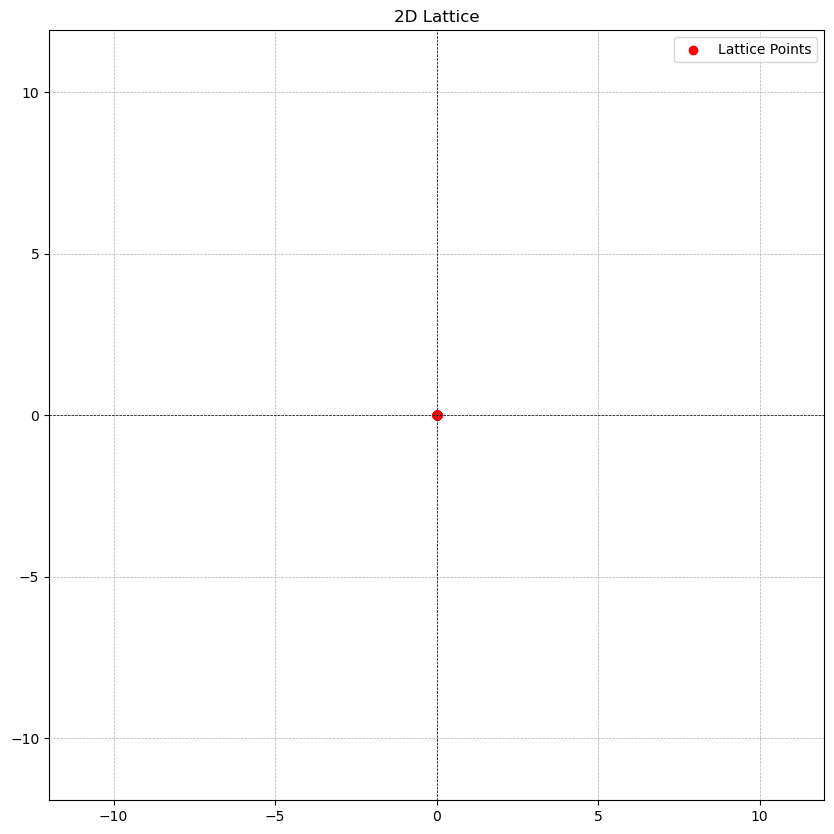

In [126]:
points = points_generator(np.array([0, 0]), np.array([0, 0]))
plotter_2d(points)

- The integers $\mathbb{Z} \in \mathbb{R}$ form a 1-dimensional lattice

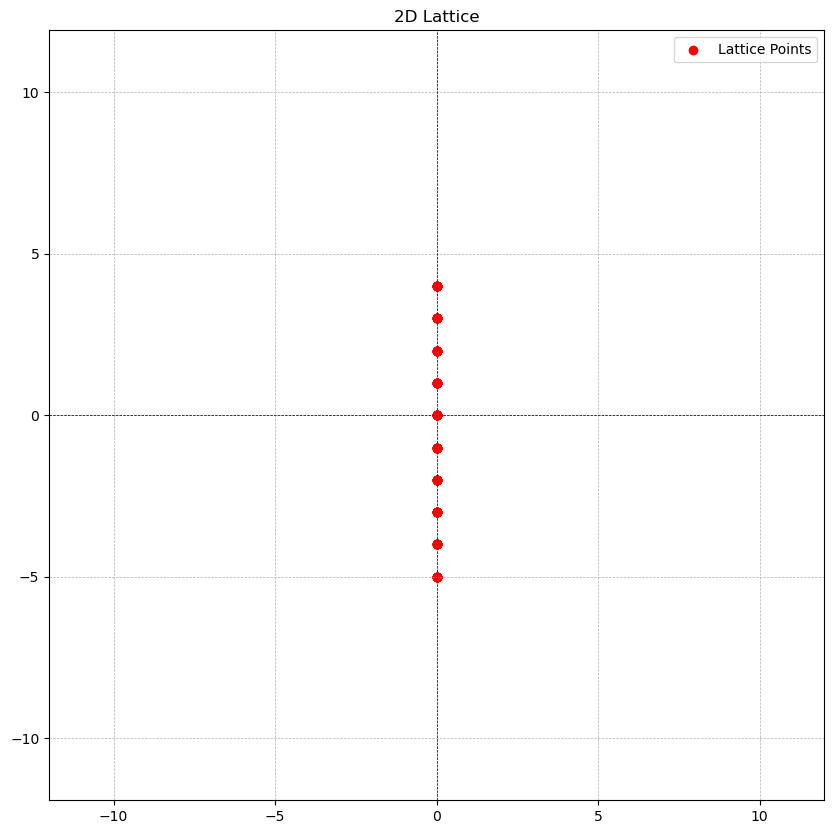

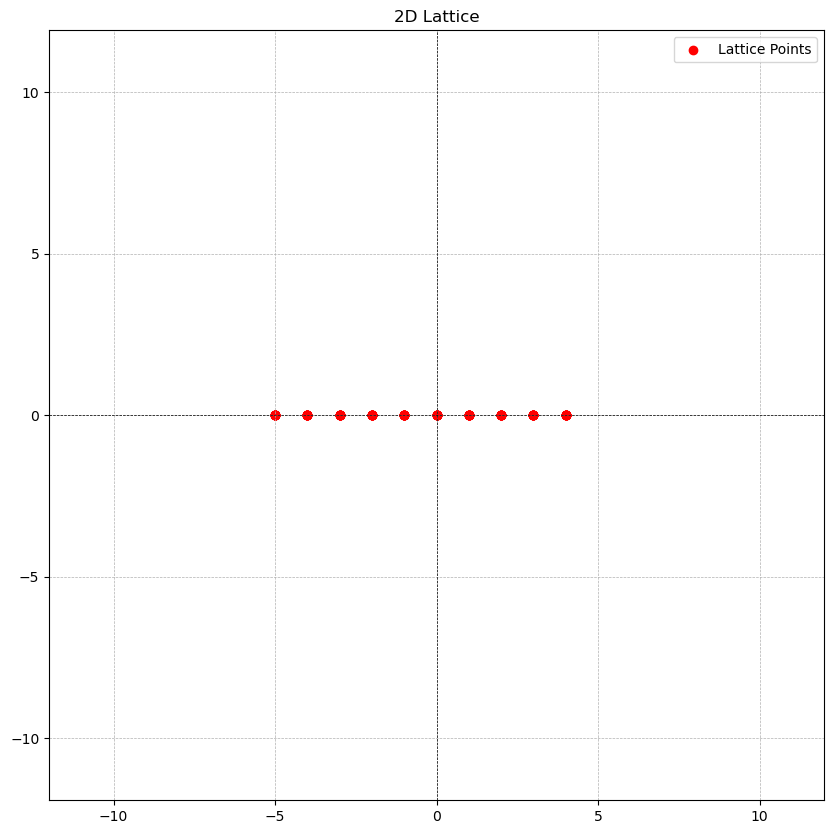

In [129]:
points = points_generator(np.array([0, 0]), np.array([0, 1]))
plotter_2d(points)
points = points_generator(np.array([1, 0]), np.array([0, 0]))
plotter_2d(points)

- The integer grid $\mathbb{Z}^n \in \mathbb{R}^n$ is an n-dimensional lattice

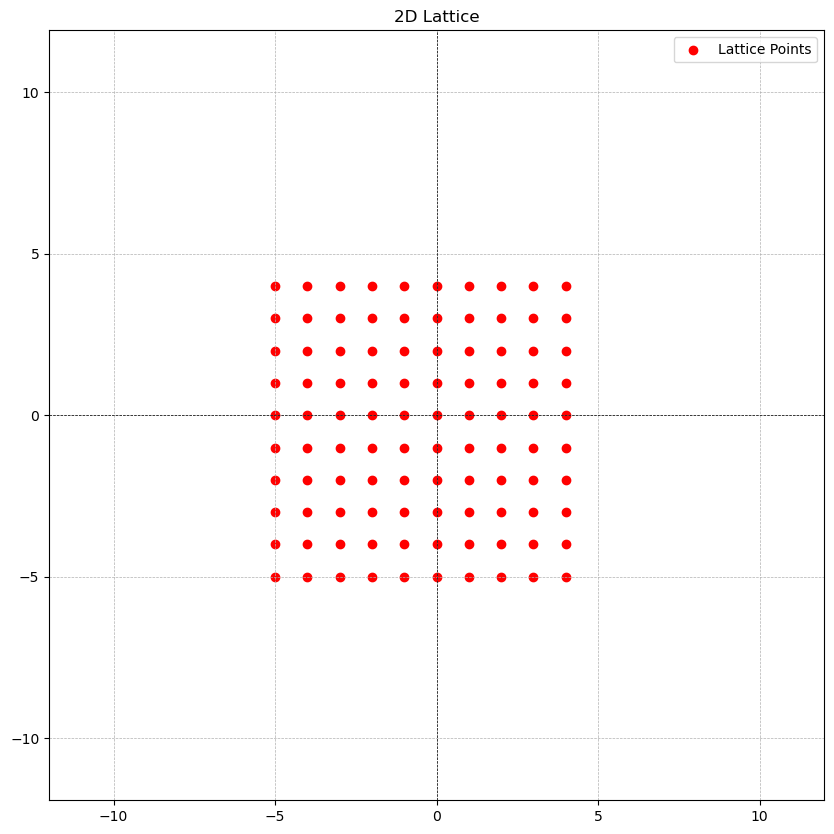

In [132]:
points = points_generator(np.array([1, 0]), np.array([0, 1]))
plotter_2d(points)

- The set $\{x ∈ \mathbb{Z}^n : \sum_{i=1}^nx_i ∈ 2\mathbb{Z}\}$ is a lattice; it is often called the “checkerboard” or “chessboard” lattice, especially in two dimensions. It contains all n-tuples of integers $x = (x_1, x_2,...,x_n) \in \mathbb{Z}$ such the sum of the components of $x$, i.e $\sum_{i = 1}^{x_i}$, is an even integer.

  **Example**: $(0,0),(1,1),(2,4),(−3,5),(−2,−2)$
  
  **Non-example**: $(1,0),(2,3),(−1,2)$

100


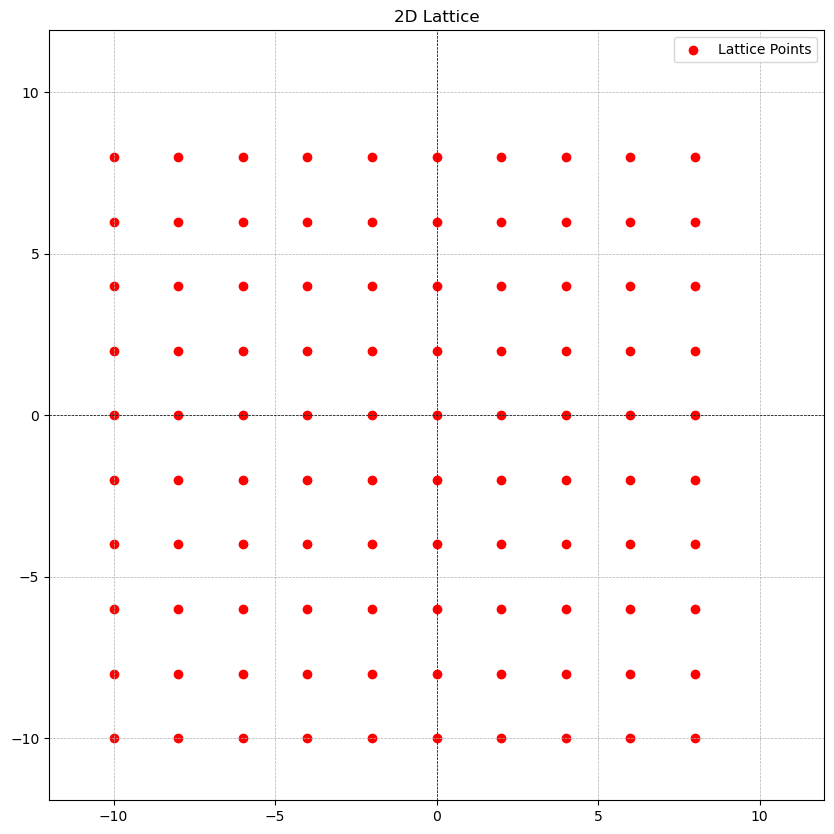

In [135]:
## CASE 1: Just even integers

# Generate lattice points
basis_1, basis_2 = np.array([1, 0]), np.array([0, 1])
x = np.arange(-5, 5)
y = np.arange(-5, 5)
lattice_points = np.array([2*ZZ(i) * basis_1 + 2*ZZ(j) * basis_2 for i in x for j in y])
print(len(lattice_points))
plotter_2d(lattice_points)

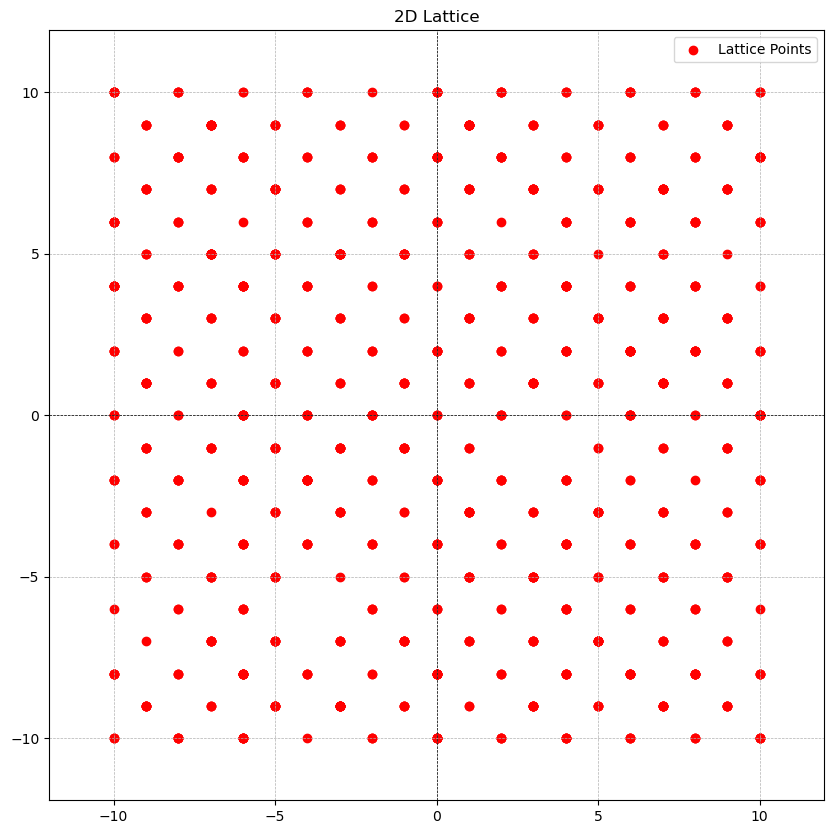

In [137]:
from random import randint

## CASE 2: random 2-tuples with sum of even integer

# Generate lattice points
basis_1, basis_2 = np.array([1, 0]), np.array([0, 1])
x = np.arange(-5, 5)
y = np.arange(-5, 5)
lattice_points = []
while len(lattice_points) < 1000:
    i = randint(-10, 10)
    j = randint(-10, 10)
    if (i + j) % 2 == 0:
        lattice_points.append([i, j])
    else: 
        continue
lattice_points = np.array(lattice_points)
plotter_2d(lattice_points)